In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Felipe Lin Oh
#RM:92936
#4SIPF

## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
    # Sua implementação deve começar aqui
     
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = np.uint8(img_gray)
    _, mask = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)
    contours,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    bandeira = {
       "italia": [(54, 146, 0), (255, 255, 255)],
        "irlanda": [(78, 153, 21), (255, 255, 255), (58, 138, 258)],
        "peru": [(17, 17, 220), (255, 255, 255)],
        "monaco": [(38, 14, 208), (255, 255, 255)],
        "singapura": [(54, 41, 248), (255, 255, 255)]
    }

    lista_bandeiras = []

    def verifica_cor(region, cor):
        lower = np.array([max(0, c - 20) for c in cor])
        upper = np.array([min(255, c + 20) for c in cor])
        mascara = cv2.inRange(region, lower, upper)
        return cv2.countNonZero(mascara) > 0.1 * region.size 
       
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 50 and h > 30:
            region = img[y:y+h, x:x+w]
            for pais, cores in bandeira.items():
                cores_presentes = sum(verifica_cor(region, cor) for cor in cores)
                if cores_presentes == len(cores):
                    lista_bandeiras.append((pais, (x, y), (x + w, y + h)))
        
        
    return lista_bandeiras
    # quando implemenar a função, remova o pass
    



In [88]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

[('singapura', (192, 497), (457, 673)), ('monaco', (726, 163), (984, 370)), ('peru', (119, 121), (380, 296)), ('monaco', (119, 121), (380, 296))]


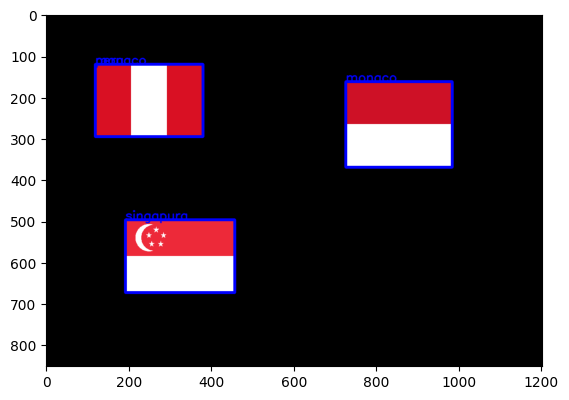

In [104]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas

img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# # Imprimir o resultado da função identifica_bandeira 
print(resultado)

# # Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


